In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
categorical = list(train.dtypes.loc[train.dtypes== 'object'].index)
print(categorical)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [8]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [9]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [10]:
train.apply(lambda x : len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [11]:
train['Age'].value_counts()/train.shape[0]

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [12]:
train['Occupation'].value_counts()/train.shape[0]

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [13]:
train['Marital_Status'].value_counts()/train.shape[0]

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [14]:
train['Product_Category_1'].value_counts()/train.shape[0]

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category_1, dtype: float64

In [15]:
train['Product_Category_2'].value_counts()/train.shape[0]

8.0     0.116509
14.0    0.100184
2.0     0.089474
16.0    0.078636
15.0    0.068819
5.0     0.047694
4.0     0.046680
6.0     0.029934
11.0    0.025695
17.0    0.024215
13.0    0.019145
9.0     0.010350
12.0    0.010050
10.0    0.005532
3.0     0.005243
18.0    0.005036
7.0     0.001138
Name: Product_Category_2, dtype: float64

In [16]:
train['Product_Category_3'].value_counts()/train.shape[0]

16.0    0.059331
15.0    0.050926
14.0    0.033501
17.0    0.030364
5.0     0.030284
8.0     0.022837
9.0     0.021050
12.0    0.016809
13.0    0.009924
6.0     0.008890
18.0    0.008415
4.0     0.003409
11.0    0.003281
10.0    0.003138
3.0     0.001114
Name: Product_Category_3, dtype: float64

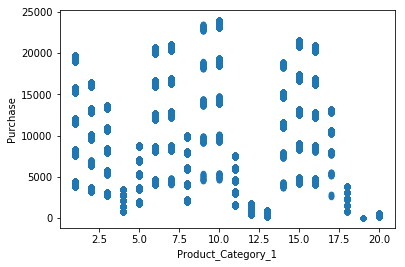

In [17]:
%matplotlib inline
train.plot('Product_Category_1','Purchase',kind = 'scatter')

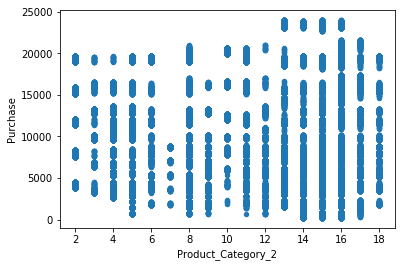

In [18]:
train.plot('Product_Category_2','Purchase',kind = 'scatter')

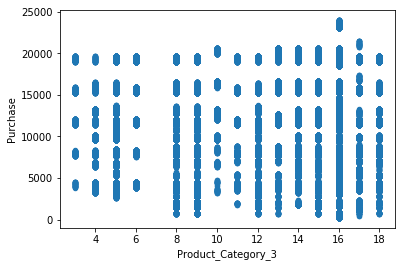

In [19]:
train.plot('Product_Category_3','Purchase',kind = 'scatter')

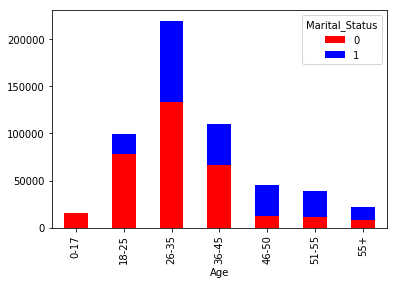

In [20]:
ct = pd.crosstab(train['Age'],train['Marital_Status'])
ct.plot(kind = 'bar',stacked = True , color = ['red','blue'])

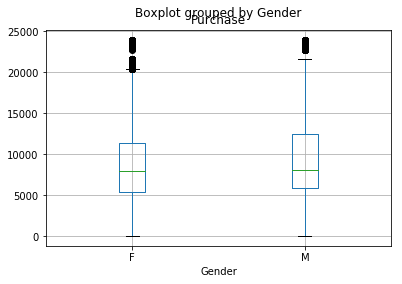

In [21]:
train.boxplot(column = 'Purchase',by = 'Gender')

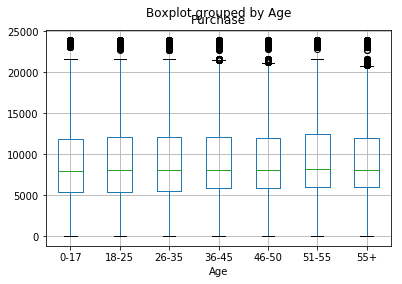

In [22]:
train.boxplot(column = 'Purchase',by = 'Age')

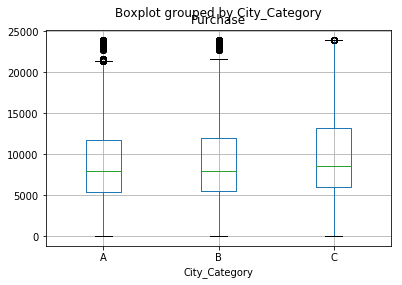

In [23]:
train.boxplot(column = 'Purchase',by = 'City_Category')

In [24]:
train.apply(lambda x : sum(x.isnull()))

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [25]:
test.apply(lambda x : sum(x.isnull()))

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [26]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].median())
train['Product_Category_3'] = train['Product_Category_3'].fillna(train['Product_Category_3'].median())

In [27]:
train.apply(lambda x : sum(x.isnull()))

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [28]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].median())
test['Product_Category_3'] = test['Product_Category_3'].fillna(test['Product_Category_3'].median())

In [29]:
test.apply(lambda x : sum(x.isnull()))

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [30]:
features = train.dtypes

In [31]:
for val in categorical:
    freq = train[val].value_counts()/train.shape[0]
    cat_to_combine = freq.loc[freq.values < 0.03].index
    
for cat in cat_to_combine:
    train[cat] = train[cat].replace({cat :'Others'},inplace = True)
    test[cat] = test[cat].replace({cat : 'Others'},inplace = True)

In [32]:
float_val = list(train.dtypes.loc[train.dtypes == 'float64'].index)
print(float_val)

['Product_Category_2', 'Product_Category_3']


In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
for val in categorical:
    train[val] = le.fit_transform(train[val])
    test[val] = le.fit_transform(test[val])

In [35]:
for val in float_val:
    train[val] = le.fit_transform(train[val])
    test[val] = le.fit_transform(test[val])

In [36]:
train.dtypes

User_ID                       int64
Product_ID                    int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
Purchase                      int64
dtype: object

In [37]:
test.dtypes

User_ID                       int64
Product_ID                    int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Product_Category_3            int64
dtype: object

In [38]:
from sklearn.model_selection import train_test_split
dep_var = 'Purchase'
indep_var = [x for x in train.columns if x not in ['User_ID','Product_ID',dep_var]]

In [39]:
print(indep_var)

['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [40]:
x_train,x_test,y_train,y_test = train_test_split(train[indep_var],train[dep_var],test_size = 0.3,random_state = 20)

In [41]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
predicted = reg.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted)

0.12710931735470288

In [44]:
lasso = linear_model.LassoCV(cv = 5,normalize = True,random_state = 10,alphas = [0.0005])
lasso.fit(x_train,y_train)


LassoCV(alphas=[0.0005], copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=10, selection='cyclic', tol=0.0001,
    verbose=False)

In [45]:
predict = lasso.predict(x_test)

In [46]:
r2_score(y_test,predict)

0.12710844282569533

In [47]:
from sklearn import cross_validation
kf_total = cross_validation.KFold(len(x_train),n_folds = 10,shuffle = True,random_state = 4)
score=cross_validation.cross_val_score(reg, x_train, y_train, cv=kf_total, n_jobs=1)
score.mean()

/home/admins/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.12627461442398166

In [48]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state = 0,max_depth =6)
clf.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [49]:
kf_total = cross_validation.KFold(len(x_train),n_folds = 10,shuffle = True,random_state = 4)
score = cross_validation.cross_val_score(clf,x_train,y_train,cv = kf_total,n_jobs=1)
score.mean()

0.6395331086000933

In [50]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators = 100,oob_score=True,n_jobs=1,random_state = 50,max_features = 9,min_samples_leaf = 75)

In [51]:
clf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=75,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [52]:
kf_total = cross_validation.KFold(len(x_train),n_folds = 10,shuffle = True,random_state = 4)
score = cross_validation.cross_val_score(clf,x_train,y_train,cv = kf_total,n_jobs=1)
score.mean()

0.663174884345108